# 数値計算  
- **Submission date**: 2017/11/24
- **Team**: へび  
- **Members**:  
    + #5501 Kazunori Sakai  
    + #5531 Akihiro Nitta  
    + #5557 Yuki Kotakehara  

## 9.9 課題と解答例 [p. 97]
**課題**. 下の例にしたがって， sin(i/13) と sin(i/2) の合成はを作成し，FFTをかけた後，周波数での強度を表示せよ．合成波 (2*sin(i*2)+sin(i/2)) との違いを述べよ．

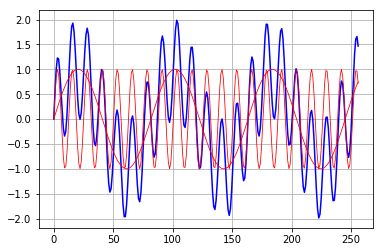

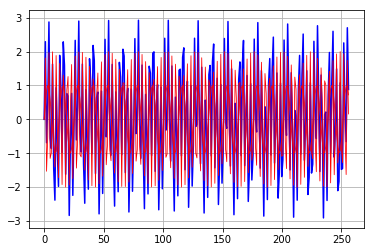

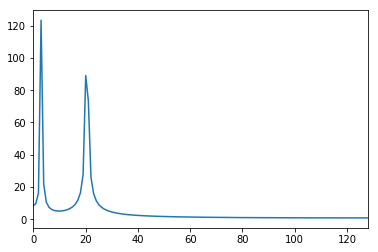

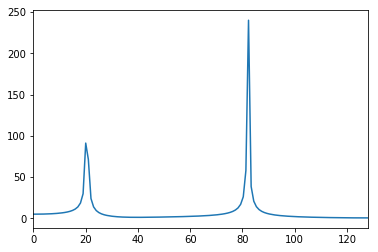

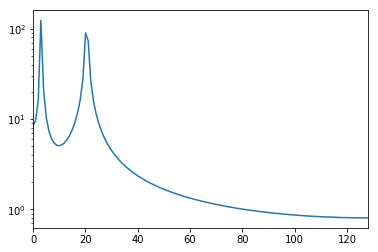

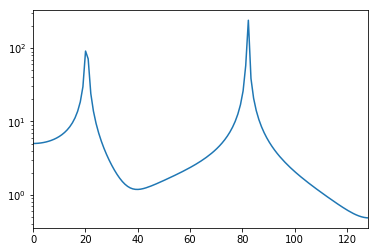

sin(i/13)とsin(i/2)の合成波と合成波(2*sin(i*2)+sin(i/2))との違いは
sin(i/13)とsin(i/2)の合成波はシグナル(低周波)となるゆっくり変化する波(sin(i/13))とノイズ(高周波)となる激しく変化する波(sin(i/2))が重なっているのに対して
合成波(2*sin(i*2)+sin(i/2))はどちらも高周波の波が重なっているため合成波も激しく変化する波となっている
またFFTを掛けて周波数で表示すると低周波な波ほど左に現れるためsin(i/13)とsin(i/2)の合成波のほうは左にsin(i/13)の波が右にsin(i/2)の波が表れている
合成波(2*sin(i*2)+sin(i/2))のほうはsin(i/2)よりsin(i*2)が右に表れておりsin(i*2)のほうは強度が2倍になっているためグラフ上にて2倍高く表示されている


In [1]:
from scipy import fft
import matplotlib.pyplot as plt
import numpy as np


def func(x):
    return np.sin(x/13)+np.sin(x/2)

def func2(x):
    return 2*(np.sin(x*2))+np.sin(x/2)


x = np.linspace(0, 256, 256)  #0から2πまでの範囲を100分割したnumpy配列
plt.plot(x, func(x), color = 'b')
plt.plot(x, np.sin(x/13), color = 'r', linewidth=0.8)
plt.plot(x, np.sin(x/2), color = 'r', linewidth=0.8)

plt.grid()
plt.show()

plt.plot(x, func2(x), color = 'b')
plt.plot(x, 2*np.sin(x*2), color = 'r', linewidth=0.8)
plt.plot(x, np.sin(x/2), color = 'r', linewidth=0.8)

plt.grid()
plt.show()

yy = func(x)
out = fft(yy)

yy2 = func2(x)
out2 = fft(yy2)

def spectrum_power(x):
    re, im = x.real, x.imag
    return np.sqrt(re**2+im**2)

plt.plot(x,spectrum_power(out))
plt.xlim(0,128)
plt.show()

plt.plot(x,spectrum_power(out2))
plt.xlim(0,128)
plt.show()

plt.plot(x,spectrum_power(out))
plt.xlim(0,128)
plt.yscale('log')
plt.show()

plt.plot(x,spectrum_power(out2))
plt.xlim(0,128)
plt.yscale('log')
plt.show()

print("sin(i/13)とsin(i/2)の合成波と合成波(2*sin(i*2)+sin(i/2))との違いは")
print("sin(i/13)とsin(i/2)の合成波はシグナル(低周波)となるゆっくり変化する波(sin(i/13))とノイズ(高周波)となる激しく変化する波(sin(i/2))が重なっているのに対して")
print("合成波(2*sin(i*2)+sin(i/2))はどちらも高周波の波が重なっているため合成波も激しく変化する波となっている")
print("またFFTを掛けて周波数で表示すると低周波な波ほど左に現れるためsin(i/13)とsin(i/2)の合成波のほうは左にsin(i/13)の波が右にsin(i/2)の波が表れている")
print("合成波(2*sin(i*2)+sin(i/2))のほうはsin(i/2)よりsin(i*2)が右に表れておりsin(i*2)のほうは強度が2倍になっているためグラフ上にて2倍高く表示されている")